In [1]:
setwd("/import/home/share/zw/HSS")
getwd()

[1] "/import/home/share/zw/HSS"

In [2]:
# install.packages("devtools")
# devtools::install_github("statwangz/HSS")
library(HSS)

Loading required package: tidyverse

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.1.1     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: genio



In [3]:
trait_info

Trait,PMID,Description
<chr>,<dbl>,<chr>
Angina,31427789,Vascular/heart problems diagnosed by doctor: Angina
BMI,31427789,Body Mass Index
Depression,29942085,Depressive symptoms
Hair,31427789,"Hair colour (natural, before greying): Black"
HBP,31427789,Vascular/heart problems diagnosed by doctor: High blood pressure
Height,31427789,Standing height
Income,31427789,Average total household income before tax
Intelligence,31427789,Fluid intelligence test - Fluid intelligence score
MDD,31427789,"Diagnoses - secondary ICD10: F32 Major depressive disorder, single episode"


In [4]:
# LD score regression
load("out/ldsc.rda")
ldsc %>%
  select(-Trait) %>%
  round(digits = 3) %>%
  cbind(Trait = ldsc$Trait, .)

Trait,h2,se
<chr>,<dbl>,<dbl>
Angina,0.022,0.002
BMI,0.238,0.008
Depression,0.051,0.003
Hair,0.064,0.009
HBP,0.125,0.005
Height,0.457,0.019
Income,0.069,0.004
Intelligence,0.195,0.010
MDD,0.019,0.002


In [5]:
# XPASS
load("out/xpass.rda")
xpass %>%
  select(-Trait) %>%
  round(digits = 3) %>%
  cbind(Trait = xpass$Trait, .)

Trait,h2,se,h2_cov,se_cov,h2_cov_5pc,se_cov_5pc,h2_cov_10pc,se_cov_10pc
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Angina,0.015,0.001,0.023,0.001,0.024,0.001,0.025,0.001
BMI,0.148,0.004,0.237,0.007,0.245,0.007,0.252,0.007
Depression,0.030,0.001,0.047,0.002,0.049,0.002,0.050,0.002
Hair,0.083,0.006,0.133,0.010,0.138,0.010,0.142,0.011
HBP,0.080,0.003,0.128,0.004,0.132,0.004,0.136,0.004
Height,0.341,0.013,0.544,0.020,0.563,0.021,0.578,0.021
Income,0.048,0.002,0.077,0.003,0.080,0.003,0.082,0.003
Intelligence,0.118,0.005,0.188,0.008,0.195,0.008,0.200,0.009
MDD,0.008,0.001,0.013,0.001,0.013,0.001,0.014,0.001


In [6]:
# compare the h2 estimated by these two methods
ldsc_xpass <- data.frame(Trait = ldsc$Trait,
                         h2_ldsc = ldsc$h2, se_ldsc = ldsc$se,
                         h2_xpass = xpass$h2, se_xpass = xpass$se)
p <- ggplot(data = ldsc_xpass, aes(x = h2_ldsc, y = h2_xpass)) +
  geom_errorbar(aes(ymin = h2_xpass - se_xpass, ymax = h2_xpass + se_xpass), colour = "gray60", size = 1) +
  geom_errorbarh(aes(xmin = h2_ldsc - se_ldsc, xmax = h2_ldsc + se_ldsc), colour = "gray60", size = 1) +
  geom_point(size = 3, colour = "#4F86C6") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed") +
  xlim(0, 0.6) +
  ylim(0, 0.6) +
  xlab("LD score regression") +
  ylab("XPASS") +
  ggtitle("XPASS without covariate - LDSC") +
  theme(text = element_text(size = 20), axis.title = element_text(size = 20), axis.text = element_text(size = 20))

ldsc_xpass_cov <- data.frame(Trait = ldsc$Trait,
                             h2_ldsc = ldsc$h2, se_ldsc = ldsc$se,
                             h2_xpass = xpass$h2_cov, se_xpass = xpass$se_cov)
p_cov <- ggplot(data = ldsc_xpass_cov, aes(x = h2_ldsc, y = h2_xpass)) +
  geom_errorbar(aes(ymin = h2_xpass - se_xpass, ymax = h2_xpass + se_xpass), colour = "gray60", size = 1) +
  geom_errorbarh(aes(xmin = h2_ldsc - se_ldsc, xmax = h2_ldsc + se_ldsc), colour = "gray60", size = 1) +
  geom_point(size = 3, colour = "#4F86C6") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed") +
  xlim(0, 0.6) +
  ylim(0, 0.6) +
  xlab("LD score regression") +
  ylab("XPASS") +
  ggtitle("XPASS with covariates - LDSC") +
  theme(text = element_text(size = 20), axis.title = element_text(size = 20), axis.text = element_text(size = 20))

ldsc_xpass_cov_5pc <- data.frame(Trait = ldsc$Trait,
                                 h2_ldsc = ldsc$h2, se_ldsc = ldsc$se,
                                 h2_xpass = xpass$h2_cov_5pc, se_xpass = xpass$se_cov_5pc)
p_cov_5pc <- ggplot(data = ldsc_xpass_cov_5pc, aes(x = h2_ldsc, y = h2_xpass)) +
  geom_errorbar(aes(ymin = h2_xpass - se_xpass, ymax = h2_xpass + se_xpass), colour = "gray60", size = 1) +
  geom_errorbarh(aes(xmin = h2_ldsc - se_ldsc, xmax = h2_ldsc + se_ldsc), colour = "gray60", size = 1) +
  geom_point(size = 3, colour = "#4F86C6") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed") +
  xlim(0, 0.6) +
  ylim(0, 0.6) +
  xlab("LD score regression") +
  ylab("XPASS") +
  ggtitle("XPASS with covariates and 5 PC - LDSC") +
  theme(text = element_text(size = 18), axis.title = element_text(size = 20), axis.text = element_text(size = 20))

ldsc_xpass_cov_10pc <- data.frame(Trait = ldsc$Trait,
                                 h2_ldsc = ldsc$h2, se_ldsc = ldsc$se,
                                 h2_xpass = xpass$h2_cov_10pc, se_xpass = xpass$se_cov_10pc)
p_cov_10pc <- ggplot(data = ldsc_xpass_cov_10pc, aes(x = h2_ldsc, y = h2_xpass)) +
  geom_errorbar(aes(ymin = h2_xpass - se_xpass, ymax = h2_xpass + se_xpass), colour = "gray60", size = 1) +
  geom_errorbarh(aes(xmin = h2_ldsc - se_ldsc, xmax = h2_ldsc + se_ldsc), colour = "gray60", size = 1) +
  geom_point(size = 3, colour = "#4F86C6") +
  geom_abline(slope = 1, intercept = 0, linetype = "dashed") +
  xlim(0, 0.6) +
  ylim(0, 0.6) +
  xlab("LD score regression") +
  ylab("XPASS") +
  ggtitle("XPASS with covariates and 10 PC - LDSC") +
  theme(text = element_text(size = 18), axis.title = element_text(size = 20), axis.text = element_text(size = 20))

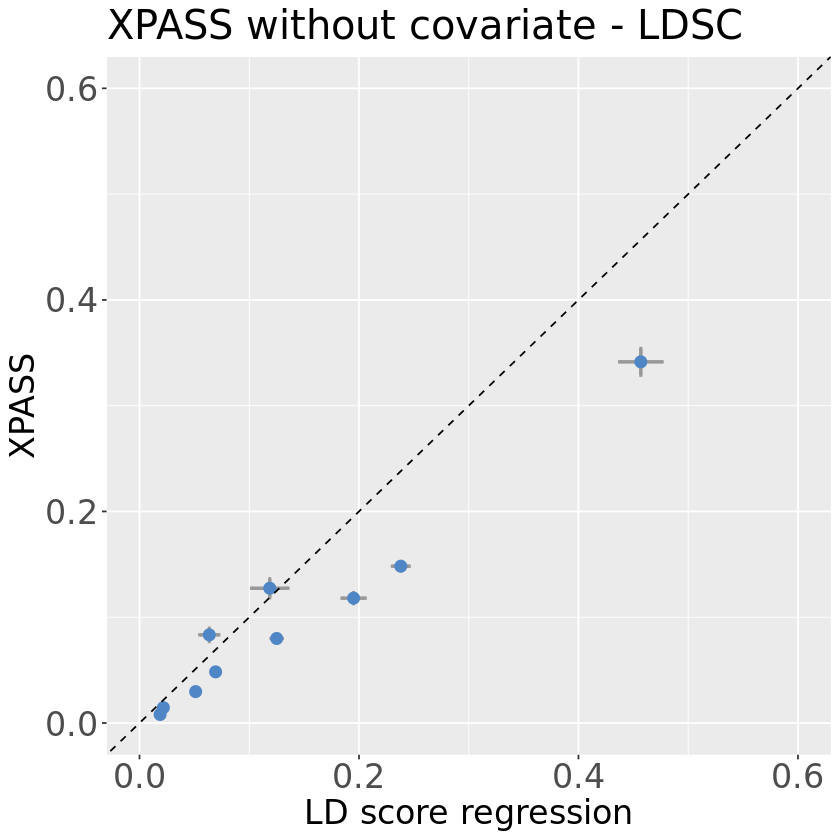

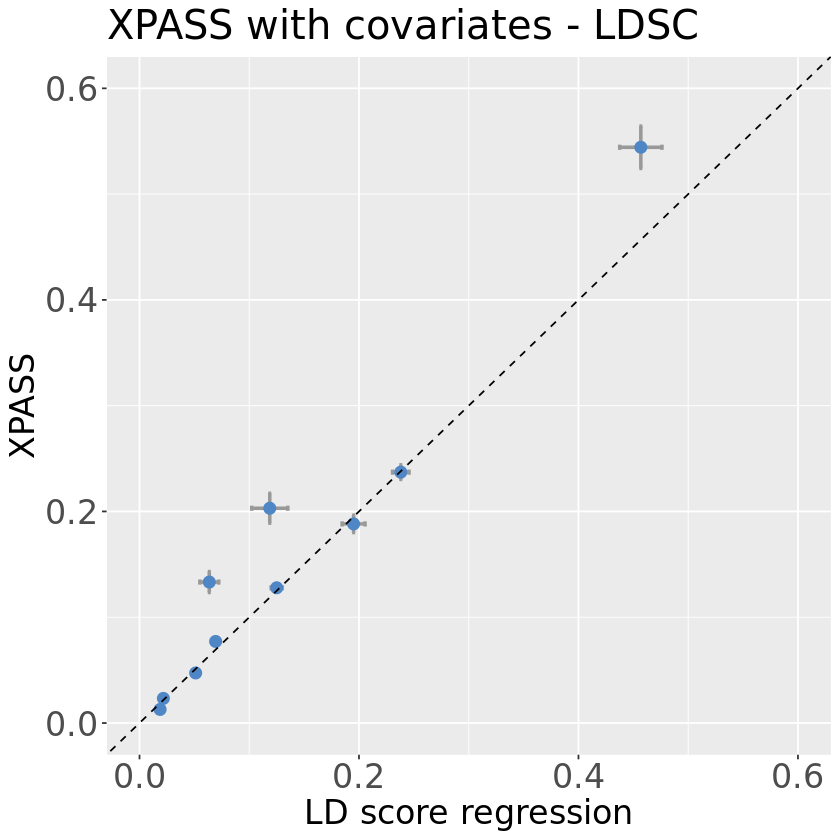

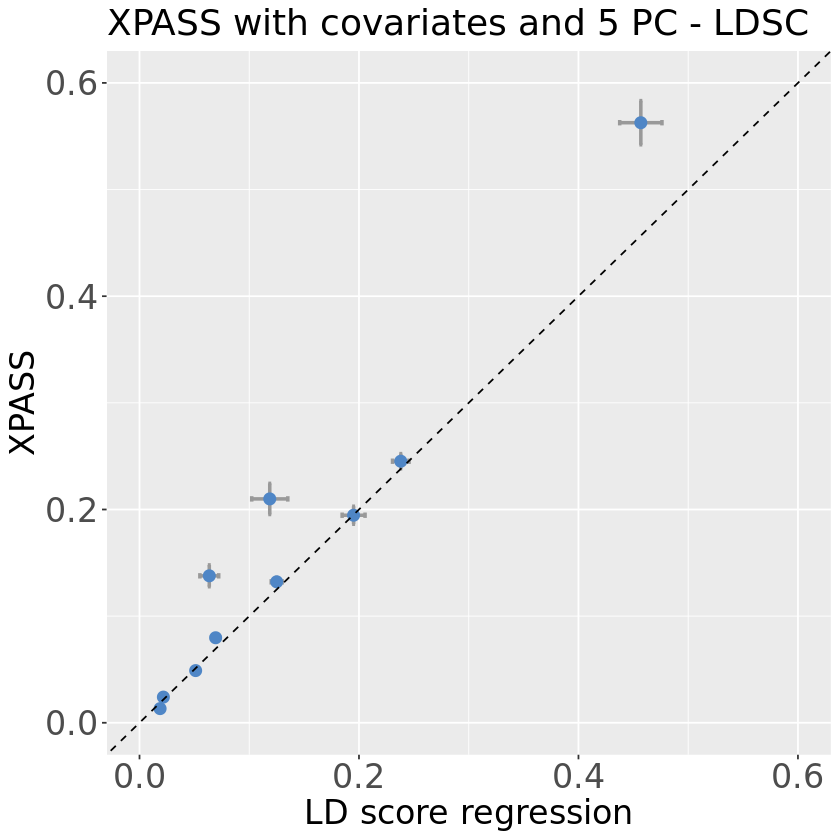

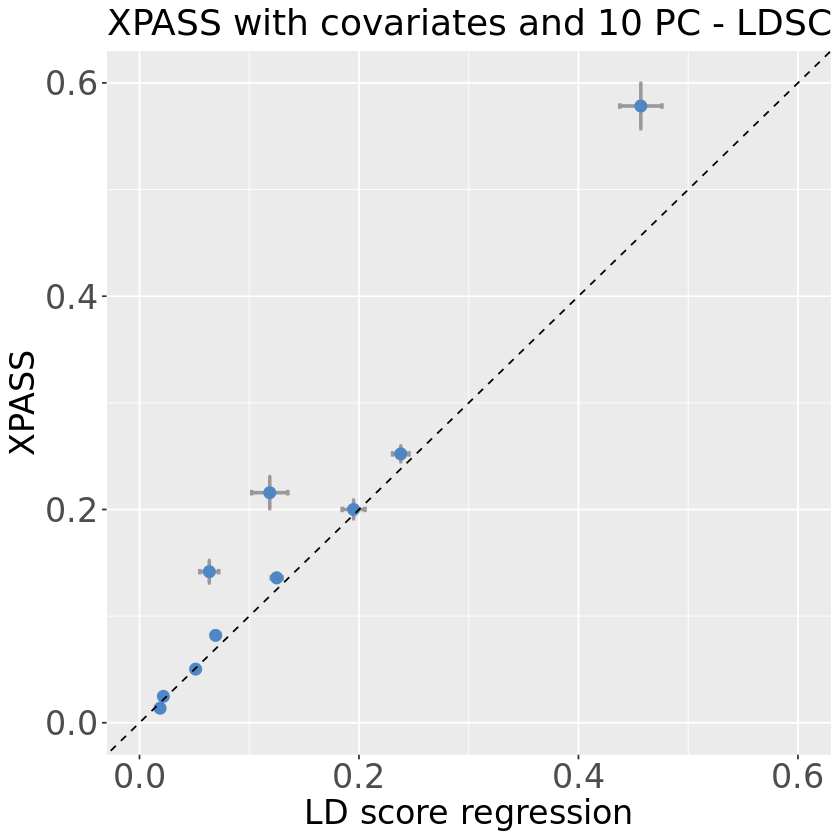

In [7]:
# install.packages("ggpubr")
# library(ggpubr)
# ggarrange(p, p_cov, p_cov_5pc, p_cov_10pc,
#           ncol = 2, nrow = 2)

p
p_cov
p_cov_5pc
p_cov_10pc